<h1 align='center'> <b>MÔN HỌC: KỸ NGHỆ TRI THỨC VÀ HỌC MÁY (7080510)</b> </h1>

---
* Giảng viên: Đặng Văn Nam
* Email: dangvannam@humg.edu.n
---

# <b>CHƯƠNG 6: GIỚI THIỆU HỌC SÂU (DEEP LEARNING)</b>
**NỘI DUNG BÀI HỌC:**
1. Giới thiệu chung về học sâu
    * Học sâu là gì? ứng dụng của học sâu.
    * Phân biệt giữa học máy và học sâu.
2. Một số mạng học sâu cơ bản:
    * Mạng nơ-ron tích chập (CNN)
    * Mạng nơ-ron hồi quy (RNN)
3. Một số Framwork cho học sâu
4. Xây dựng mô hình nhận dạng hoa dựa trên học sâu

---
Copyright: Đặng Văn Nam FIT.HUMG

#**4. XÂY DỰNG MÔ HÌNH HỌC SÂU NHẬN DẠNG VÀ PHÂN LOẠI HOA SỬ DỤNG MẠNG CNN**
---
**MÔ TẢ BÀI TOÁN:**

**Tập dữ liệu:** gồm 3700 ảnh kích thước khác nhau của 4 loại hoa bao gồm:
1. Hoa cúc (Daisy) - 650 ảnh
2. Hoa bồ công anh (Dandelion) - 900 ảnh
3. Hoa hồng (Roses) - 650 ảnh
4. Hoa hướng dương (Sunflowers) - 700 ảnh
5. Hoa Tulip (Tulips) - 800 ảnh

**Mục tiêu:**
Xây dựng được mô hình học sâu, huấn luyện, kiểm thử bộ nhận dạng hoa theo 5 loại như trên sử dụng mạng CNN.
* Ngôn ngữ: Python
* Framework: Tensorflow + Keras



In [1]:
#Khai báo sử dụng các thư viện trong ví dụ:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## **A - ĐỌC DỮ LIỆU**
---

In [2]:
#Mount tới google drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Setup đường dẫn tới thư mục ảnh:
import pathlib
dataset_url = "/content/drive/MyDrive/7080510_MachineLearing/Chương 6/Data_train"
data_dir = pathlib.Path(dataset_url)
image_count = len(list(data_dir.glob('*/*.jpg')))
print('Tổng số ảnh trong tập dữ liệu: ', image_count)

Tổng số ảnh trong tập dữ liệu:  3702


### 1.Dữ liệu Hoa cúc (daisy):
---

In [4]:
#Đọc file ảnh trong thư mục daisy vào biến daisy
daisy = list(data_dir.glob('daisy/*'))
print('Tổng số ảnh hoa cúc:',len(daisy))

Tổng số ảnh hoa cúc: 650


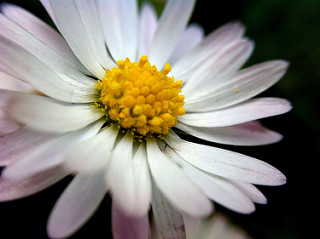

In [5]:
#Hiển thị ảnh
PIL.Image.open(str(daisy[0]))

In [6]:
daisy[:10]

[PosixPath('/content/drive/MyDrive/7080510_MachineLearing/Chương 6/Data_train/daisy/pic_daisy554.jpg'),
 PosixPath('/content/drive/MyDrive/7080510_MachineLearing/Chương 6/Data_train/daisy/pic_daisy548.jpg'),
 PosixPath('/content/drive/MyDrive/7080510_MachineLearing/Chương 6/Data_train/daisy/pic_daisy364.jpg'),
 PosixPath('/content/drive/MyDrive/7080510_MachineLearing/Chương 6/Data_train/daisy/pic_daisy21.jpg'),
 PosixPath('/content/drive/MyDrive/7080510_MachineLearing/Chương 6/Data_train/daisy/pic_daisy352.jpg'),
 PosixPath('/content/drive/MyDrive/7080510_MachineLearing/Chương 6/Data_train/daisy/pic_daisy598.jpg'),
 PosixPath('/content/drive/MyDrive/7080510_MachineLearing/Chương 6/Data_train/daisy/pic_daisy277.jpg'),
 PosixPath('/content/drive/MyDrive/7080510_MachineLearing/Chương 6/Data_train/daisy/pic_daisy255.jpg'),
 PosixPath('/content/drive/MyDrive/7080510_MachineLearing/Chương 6/Data_train/daisy/pic_daisy304.jpg'),
 PosixPath('/content/drive/MyDrive/7080510_Mach

### 2.Hoa bồ công anh (dandelion):
---

Tổng số ảnh hoa bồ công anh: 900


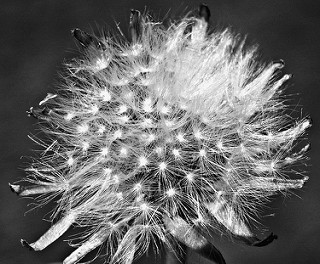

In [7]:
#Đọc file ảnh trong thư mục roses vào biến roses
dandelion = list(data_dir.glob('dandelion/*'))
print('Tổng số ảnh hoa bồ công anh:',len(dandelion))
PIL.Image.open(str(dandelion[0]))

### 3.Hoa hồng (roses):
---

Tổng số ảnh hoa hồng: 651


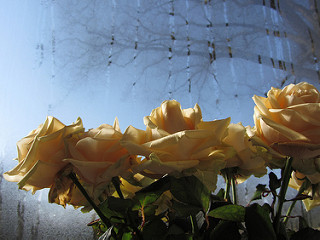

In [8]:
#Đọc file ảnh trong thư mục roses vào biến roses
roses = list(data_dir.glob('roses/*'))
print('Tổng số ảnh hoa hồng:',len(roses))
PIL.Image.open(str(roses[10]))

### 4.Hoa hướng dương (sunflowers):
---

Tổng số ảnh hoa hướng dương: 700


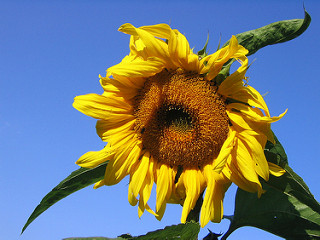

In [9]:
#Đọc file ảnh trong thư mục roses vào biến roses
sunflowers = list(data_dir.glob('sunflowers/*'))
print('Tổng số ảnh hoa hướng dương:',len(sunflowers))
PIL.Image.open(str(sunflowers[10]))

### 5.Hoa tulip (tulips):
---

Tổng số ảnh hoa tulips: 801


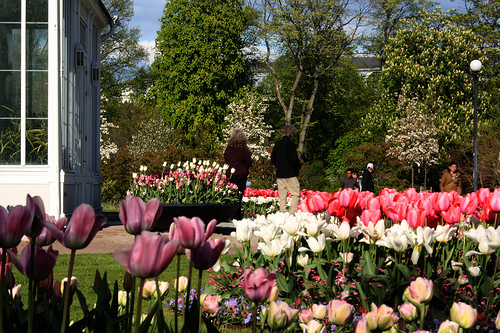

In [10]:
#Đọc file ảnh trong thư mục roses vào biến roses
tulips = list(data_dir.glob('tulips/*'))
print('Tổng số ảnh hoa tulips:',len(tulips))
PIL.Image.open(str(tulips[10]))

## **B-CHUẨN BỊ DỮ LIỆU:**
---
Sử dụng keras.preprocessing tiến hành xử lý dữ liệu ảnh:
1. Reshape kích thước ảnh về (180x180)
2. Chia thành từng batch 32 ảnh
3. Tách dữ liệu ảnh thành 2 tập Train - Test theo tỷ lệ 80:20
4. Scaling data từ [0-255] về khoảng [0-1]

### 1.Reshape kích thước và tách dữ liệu Train-Test

In [11]:
#Tạo tập dữ liệu
#Định nghĩa một số tham số xử lý ảnh
batch_size = 32
img_height = 180
img_width = 180

In [12]:
#Xử lý và Tách tập dữ liệu Train (80%)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3702 files belonging to 5 classes.
Using 2962 files for training.


In [13]:
#Xử lý và Tách tập dữ liệu validation (20%)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3702 files belonging to 5 classes.
Using 740 files for validation.


In [14]:
#Khai báo biến class_names = Tên của 5 lớp hoa
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


**Hiển thị một số hình ảnh trong tập dữ liệu huấn luyện**:

Hiển thị tất cả ảnh đầu trong patch đầu tiên của tập Training (32 ảnh)

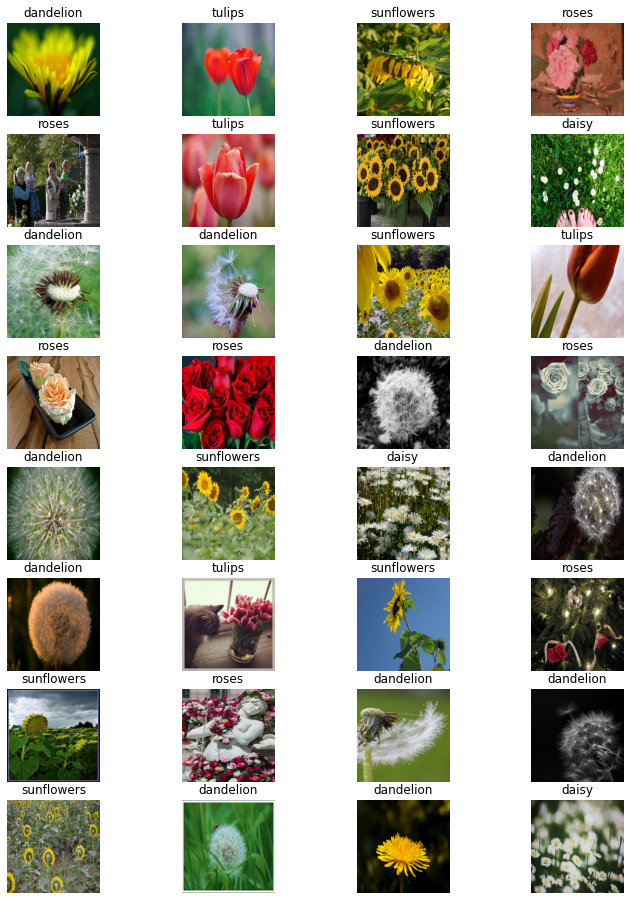

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 16))
for images, labels in train_ds.take(1):
  for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
i=0
for image_batch, labels_batch in train_ds:
    i=i+1
    print('batch: ',i)
    print('------------------------')
    print(image_batch.shape)
    print(labels_batch.shape)

batch:  1
------------------------
(32, 180, 180, 3)
(32,)
batch:  2
------------------------
(32, 180, 180, 3)
(32,)
batch:  3
------------------------
(32, 180, 180, 3)
(32,)
batch:  4
------------------------
(32, 180, 180, 3)
(32,)
batch:  5
------------------------
(32, 180, 180, 3)
(32,)
batch:  6
------------------------
(32, 180, 180, 3)
(32,)
batch:  7
------------------------
(32, 180, 180, 3)
(32,)
batch:  8
------------------------
(32, 180, 180, 3)
(32,)
batch:  9
------------------------
(32, 180, 180, 3)
(32,)
batch:  10
------------------------
(32, 180, 180, 3)
(32,)
batch:  11
------------------------
(32, 180, 180, 3)
(32,)
batch:  12
------------------------
(32, 180, 180, 3)
(32,)
batch:  13
------------------------
(32, 180, 180, 3)
(32,)
batch:  14
------------------------
(32, 180, 180, 3)
(32,)
batch:  15
------------------------
(32, 180, 180, 3)
(32,)
batch:  16
------------------------
(32, 180, 180, 3)
(32,)
batch:  17
------------------------
(32, 180, 180

In [17]:
32*92 +18

2962

Configure the dataset for performance
Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

Interested readers can learn more about both methods, as well as how to cache data to disk in the data performance guide.

In [16]:
#Nạp dữ liệu vào bộ nhớ cache để xử lý:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### 2.Chuẩn hóa dữ liệu về khoảng [0-1]
---
Các ảnh lưu trữ theo kênh màu RGB, giá trị mỗi điểm ảnh nằm trong khoảng [0-255], mạng Nơ-ron hoạt động tốt với dữ liệu nhỏ, do đó cần scaling data về khoảng nhỏ hơn, trong trường hợp này chúng ta đưa về khoảng [0,1] sử dụng phương pháp Min-Max [Lấy giá trị của mỗi điểm ảnh chia cho giá trị max(255)]

In [17]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

There are two ways to use this layer. You can apply it to the dataset by calling map:

In [18]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [19]:
first_image

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[2.19019666e-01, 2.53413260e-01, 1.73326120e-01],
        [3.03681940e-01, 3.26601326e-01, 1.76274508e-01],
        [2.90159792e-01, 3.15795243e-01, 1.47639796e-01],
        ...,
        [3.42476189e-01, 3.72076839e-01, 2.43979603e-01],
        [3.30763310e-01, 3.56601804e-01, 2.33638495e-01],
        [3.18641841e-01, 3.39150339e-01, 2.09680691e-01]],

       [[2.42614433e-01, 2.73529470e-01, 2.14989156e-01],
        [2.91568637e-01, 3.17189544e-01, 1.86339885e-01],
        [3.04509819e-01, 3.35119843e-01, 1.73180848e-01],
        ...,
        [3.16252828e-01, 3.44967365e-01, 2.04248562e-01],
        [3.03921819e-01, 3.26274753e-01, 1.86732128e-01],
        [3.06361169e-01, 3.19171906e-01, 1.88801616e-01]],

       [[2.53848970e-01, 2.85766214e-01, 2.21713901e-01],
        [2.67538130e-01, 2.97603488e-01, 1.80610046e-01],
        [2.88961530e-01, 3.24727684e-01, 1.79302856e-01],
        ...,
        [3.24292153e-01, 3.42629

## **C-XÂY DỰNG - BIÊN DỊCH MÔ HÌNH:**
---

### 1.Xây dựng mô hình thiết kế theo mạng CNN
---
Sử dụng mạng CNN được thiết kế như sau:
* Sử dụng 3 lớp Convolution, mỗi lớp bao gồm 1 lớp max pooling
* Một lớp fully connected với 128 units, sử dụng hàm kích hoạt ReLU
* Lớp cuối cùng là một lớp softmax vơi 5 class đầu ra

In [20]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, 
                                              input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### 2.Biên dịch mô hình
---
Sử dụng tối ưu Adam, và hàm mất mát loss, đánh giá mô hình sử dụng độ chính xác - Accuracy

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 3.Model summary:
---
Xem lại toàn bộ các lớp của mạng

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

## **D-HUẤN LUYỆN MÔ VÀ ĐÁNH GIÁ KẾT QUẢ:**
---
Thực hiện huấn luyện mô hình với tập huẩn luyện, và sử dụng tập kiểm chéo để đánh giá độ chính xác của mô hình.

### 1.Huấn luyện mô hình

In [23]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
93/93 [==============================] - 100s 1s/step - loss: 1.4389 - accuracy: 0.4014 - val_loss: 1.1052 - val_accuracy: 0.5514
Epoch 2/10
93/93 [==============================] - 96s 1s/step - loss: 1.0113 - accuracy: 0.5939 - val_loss: 0.9141 - val_accuracy: 0.6473
Epoch 3/10
93/93 [==============================] - 96s 1s/step - loss: 0.8094 - accuracy: 0.6884 - val_loss: 0.9247 - val_accuracy: 0.6500
Epoch 4/10
93/93 [==============================] - 95s 1s/step - loss: 0.6451 - accuracy: 0.7664 - val_loss: 0.9969 - val_accuracy: 0.6230
Epoch 5/10
93/93 [==============================] - 96s 1s/step - loss: 0.4265 - accuracy: 0.8494 - val_loss: 1.1678 - val_accuracy: 0.6419
Epoch 6/10
93/93 [==============================] - 97s 1s/step - loss: 0.2409 - accuracy: 0.9217 - val_loss: 1.2398 - val_accuracy: 0.6689
Epoch 7/10
93/93 [==============================] - 97s 1s/step - loss: 0.1308 - accuracy: 0.9588 - val_loss: 1.5848 - val_accuracy: 0.6378
Epoch 8/10
93/93 [=

### 2.Hiển thị kết quả mô hình
---
Xây dựng biểu đồ thể hiện độ chính xác (Accuracy) và hàm mất mát (Loss) trên tập dữ liệu Huấn luyện và Kiểm chéo.

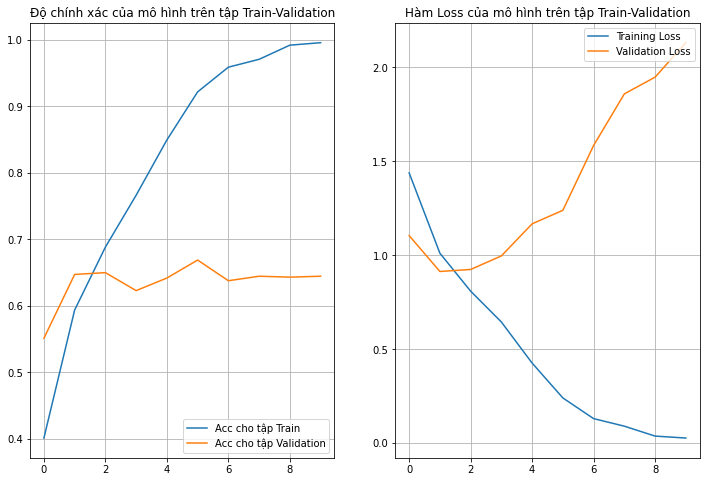

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acc cho tập Train')
plt.plot(epochs_range, val_acc, label='Acc cho tập Validation')
plt.legend(loc='lower right')
plt.title('Độ chính xác của mô hình trên tập Train-Validation')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Hàm Loss của mô hình trên tập Train-Validation')
plt.grid(True)
plt.show()

### 3.Lưu model đã huấn luyện
---

In [25]:
#Lưu model
file_model = "/content/drive/MyDrive/7080510_MachineLearing/Chương 6/Model/img_classification0.h5"
model.save(file_model)

## **E-SỬ DỤNG MODEL ĐỂ PHÂN LỚP HOA**
---
Sử dụng một ảnh Hoa bất kỳ đưa vào model đã xây dựng để dự đoán loại hoa tương ứng.

In [26]:
# Hàm hiển thị ảnh Test và độ chính xác dự đoán
def plot_image(img,score):
  label =  class_names[np.argmax(score)]
  acc = 100 * np.max(score)
  plt.xticks([])
  plt.yticks([]) 
  plt.imshow(img)
  plt.title("Đây là hoa {} với độ tin cậy đạt {:.2f} %."
    .format(class_names[np.argmax(score)].upper(), 100 * np.max(score)))

#hàm trực quan hóa kết quả đầu ra của các lớp  
def plot_value_array(score):
  plt.grid(True)
  plt.xticks(range(5), class_names, rotation=45)
  plt.yticks([1,0.8,0.6,0.4,0.2,0])
  thisplot = plt.bar(range(5), score, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(score)
  thisplot[predicted_label].set_color('red')

In [27]:
#Load model đã lưu
file_model = "/content/drive/MyDrive/Colab Notebooks/DeepLearning/Model/img_classification.h5"
model = keras.models.load_model(file_model)

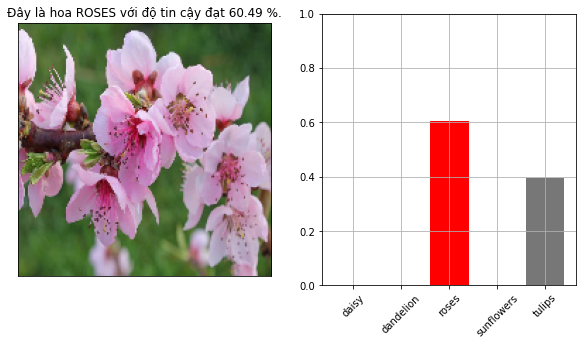

In [35]:
#Chọn bức ảnh đưa vào model dự đoán
path_img_test = "/content/drive/MyDrive/7080510_MachineLearing/Chương 6/Data_test/test7.jpg"

img = keras.preprocessing.image.load_img(
    path_img_test, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array1 = tf.expand_dims(img_array, 0) # Create a batch

#Sử dụng model để dự đoán
predictions = model.predict(img_array1)
score = tf.nn.softmax(predictions[0])

#View kết quả của mô hình với ảnh Test
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(img,score)
plt.subplot(1,2,2)
plot_value_array(score)